In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [3]:
df = pd.read_csv('C:\\Users\\ravi\\Documents\\Jobs\DavidWeekleyHomes-DataSc\Assignment\Airfares.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
S_CODE      638 non-null object
S_CITY      638 non-null object
E_CODE      638 non-null object
E_CITY      638 non-null object
COUPON      638 non-null float64
NEW         638 non-null int64
VACATION    638 non-null int64
SW          638 non-null int64
HI          638 non-null float64
S_INCOME    638 non-null int64
E_INCOME    638 non-null int64
S_POP       638 non-null int64
E_POP       638 non-null int64
SLOT        638 non-null int64
GATE        638 non-null int64
DISTANCE    638 non-null int64
PAX         638 non-null int64
FARE        638 non-null float64
dtypes: float64(3), int64(11), object(4)
memory usage: 89.8+ KB


In [46]:
df.head()


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47


In [47]:
# Correlation table
df.corr()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,0.071424,-0.188098,-0.347252,-0.088403,0.046889,-0.107763,0.094970,-0.021901,0.064369,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,-0.047433,-0.081881,0.054147,0.026597,0.113377,-0.016672,0.058568,-0.058414,-0.013106,0.080965,0.010495,0.091730
VACATION,0.071424,-0.047433,1.000000,0.025488,-0.151625,-0.216393,-0.076288,-0.208549,-0.167054,0.129514,0.116838,0.093198,-0.017747,-0.276868
SW,-0.188098,-0.081881,0.025488,1.000000,-0.040172,-0.272269,-0.281160,-0.089282,-0.221272,0.251593,0.255782,-0.240485,-0.052468,-0.543813
HI,-0.347252,0.054147,-0.151625,-0.040172,1.000000,-0.027382,0.082393,-0.172495,-0.062456,0.185179,-0.155182,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.216393,-0.272269,-0.027382,1.000000,-0.138864,0.517187,-0.272280,-0.231868,-0.108193,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,-0.076288,-0.281160,0.082393,-0.138864,1.000000,-0.144059,0.458418,-0.197481,-0.062807,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.208549,-0.089282,-0.172495,0.517187,-0.144059,1.000000,-0.280143,-0.281576,-0.085900,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.167054,-0.221272,-0.062456,-0.272280,0.458418,-0.280143,1.000000,-0.246216,-0.149666,0.115640,0.314698,0.285043
SLOT,-0.021901,-0.058414,0.129514,0.251593,0.185179,-0.231868,-0.197481,-0.281576,-0.246216,1.000000,-0.143628,-0.009483,-0.243143,-0.209438


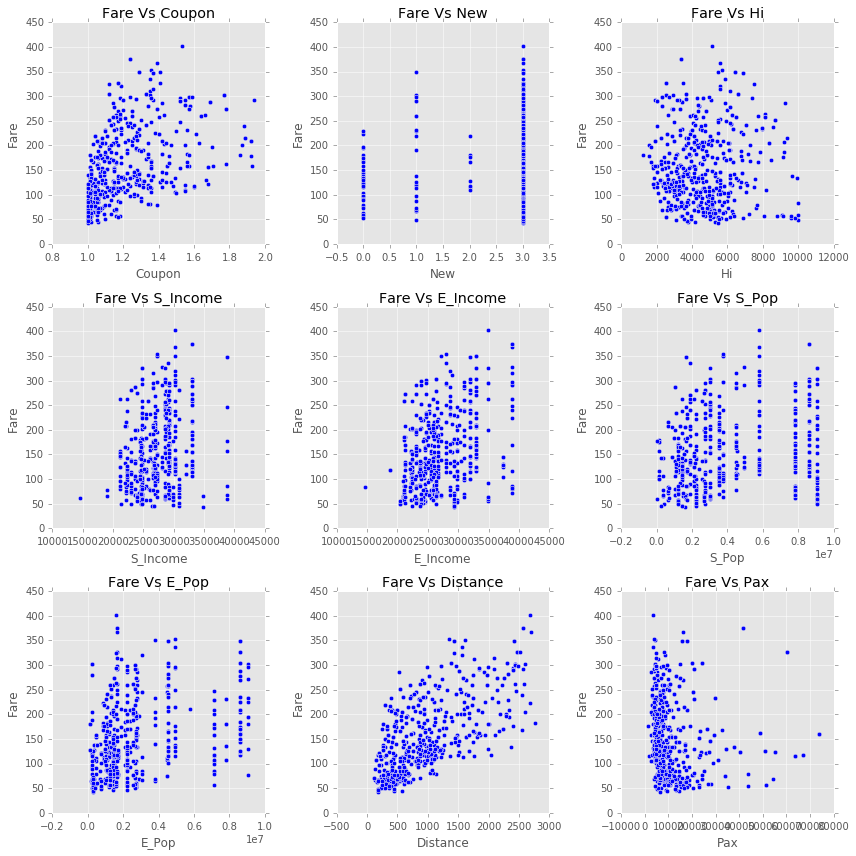

In [51]:
# Numeric features are COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE and PAX
# Scatterplots between FARE and above 9 features
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12), dpi=100)

ax[0,0].set_title("Fare Vs Coupon")
ax[0,0].set_xlabel("Coupon")
ax[0,0].set_ylabel("Fare")
ax[0,0].scatter(df['COUPON'], df['FARE'])

ax[0,1].set_title("Fare Vs New")
ax[0,1].set_xlabel("New")
ax[0,1].set_ylabel("Fare")
ax[0,1].scatter(df['NEW'], df['FARE'])

ax[0,2].set_title("Fare Vs Hi")
ax[0,2].set_xlabel("Hi")
ax[0,2].set_ylabel("Fare")
ax[0,2].scatter(df['HI'], df['FARE'])

ax[1,0].set_title("Fare Vs S_Income")
ax[1,0].set_xlabel("S_Income")
ax[1,0].set_ylabel("Fare")
ax[1,0].scatter(df['S_INCOME'], df['FARE'])

ax[1,1].set_title("Fare Vs E_Income")
ax[1,1].set_xlabel("E_Income")
ax[1,1].set_ylabel("Fare")
ax[1,1].scatter(df['E_INCOME'], df['FARE'])

ax[1,2].set_title("Fare Vs S_Pop")
ax[1,2].set_xlabel("S_Pop")
ax[1,2].set_ylabel("Fare")
ax[1,2].scatter(df['S_POP'], df['FARE'])

ax[2,0].set_title("Fare Vs E_Pop")
ax[2,0].set_xlabel("E_Pop")
ax[2,0].set_ylabel("Fare")
ax[2,0].scatter(df['E_POP'], df['FARE'])

ax[2,1].set_title("Fare Vs Distance")
ax[2,1].set_xlabel("Distance")
ax[2,1].set_ylabel("Fare")
ax[2,1].scatter(df['DISTANCE'], df['FARE'])

ax[2,2].set_title("Fare Vs Pax")
ax[2,2].set_xlabel("Pax")
ax[2,2].set_ylabel("Fare")
ax[2,2].scatter(df['PAX'], df['FARE'])
                               
plt.tight_layout()

ANSWER TO Q1:
There are two features that have a strong linear relationship with FARE. These predictors are COUPON and DISTANCE. Of the two, 
the DISTANCE feature has a higher positive correlation value of 0.67 compared to that of 0.49 for COUPON.
The single best predictor of FARE is DISTANCE.

In [116]:
# Partition the dataframe into training and test data with test data size being 40% using random seed of 1
# Numeric features are COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE and PAX
y = df['FARE']
reject = ['FARE', 'S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE']
X = df.drop(reject, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test).reshape(-1,1)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))


R^2: 0.7007185579002905
Mean Squared Error: 1838.8093994976066
Root Mean Squared Error: 42.881340924668
Mean Absolute Error: 34.51812779684737


INTERPRETATION: 

R-squared is the proportion of variance in the observed data.
A higher value for R-squared is good. 
Higher values are better because it shows that more variance is explained by the model.

In [110]:
# Now let us remove the feature COUPON and see the effect on RMSE
y = df['FARE']
reject = ['FARE', 'S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE','COUPON']
X = df.drop(reject, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test).reshape(-1,1)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))


R^2: 0.6979287038512059
Mean Squared Error: 1855.9504885430624
Root Mean Squared Error: 43.0807438253225
Mean Absolute Error: 34.94119669805387


Removing COUPON feature above increased the RMSE. We always want to minimize the error. It is not good to increase the RMSE value.
Removing other features increases the RMSE to 54. Therefore, we have a good model in place.

In [99]:
# print y-int
print(reg_all.intercept_)
# print beta coefficients
print(reg_all.coef_)
# Pairing feature names and coefficients
pairs = list(zip(X.columns, reg_all.coef_))
print(pairs)

-203.1964170184912
[ 2.35415138e+01 -1.17231326e+00  1.00925554e-02  3.95438413e-03
  2.49550727e-03  7.15531549e-06  9.77370146e-06  6.92917341e-02
 -1.22627201e-03]
[('COUPON', 23.5415138023931), ('NEW', -1.1723132583282199), ('HI', 0.010092555362819), ('S_INCOME', 0.0039543841307942505), ('E_INCOME', 0.002495507270047393), ('S_POP', 7.155315490775339e-06), ('E_POP', 9.773701455808663e-06), ('DISTANCE', 0.06929173407055027), ('PAX', -0.0012262720063290853)]


y = -203.196 + 23.5415 * COUPON + 0.0100 * HI + ........ + 00692 * DISTANCE + (-0.0012) * PAX

INTERPRETATION: 
The ('DISTANCE', 0.06929173407055027) indicates that a "unit" increase in Distance contributes to about 7% increase in FARE. This is when all other features are considered at a given instant of time.

[ 2.88694269e+00  0.00000000e+00  3.47895087e-03  1.90530725e-03
  1.04134085e-03  1.17802294e-06  3.61886547e-06  6.43339612e-02
 -0.00000000e+00]


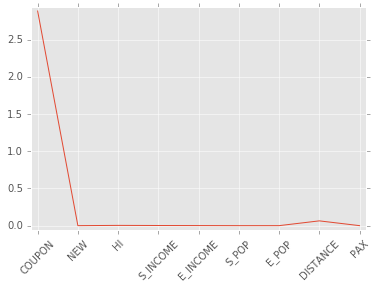

In [82]:
# Usng Regularization to perform feature selection
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
print(lasso_coef)
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=45)
plt.margins(0.02)
plt.show()

OBSERVATION:
Lasso does regularization by penalizing the features with high coefficients. The loss function is the standard OLS loss function.

In this case it is the COUPON feature that has a 
high value of 23.54. This prevents such features from overfitting the model. 

From the figure above, it is clear that DISTANCE is the best feature that predicts the target variable FARE. All the others are 
reduced to 0.

C:\Users\ravi\AppData\Roaming\Python\Python35\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ravi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1832: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


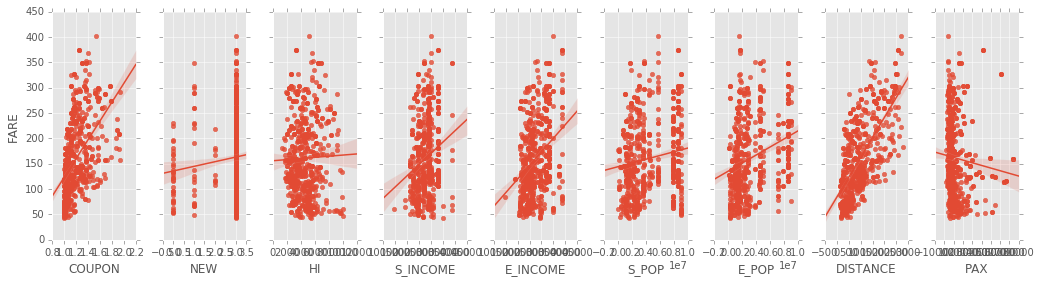

In [98]:
# Pair plots using Seaborn
sns.pairplot(df, x_vars=['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX'], 
             y_vars='FARE', size=4, aspect=0.4, kind='reg')

The pair plots above clearly show that DISTANCE has the strongest linear relationship compared to any of the other features.

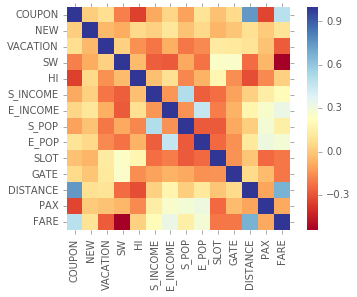

In [95]:
# Heat map using SNS 
sns.heatmap(df.corr(), square=True, cmap='RdYlBu') 

Again, DISTANCE has the strongest shade of blue against the target variable FARE

In [112]:
print(df['COUPON'].corr(df['DISTANCE']))

0.7468052137570204


FREAK OBSERVATION:
The correlation between COUPON and DISTANCE features is very high. This is to be borne in mind (just in case)

QUESTION 2: Find a linear regression model for predicting the average fare on a new route. Interpret the output.    
(looking for a summary() from sm.ols() against the train dataframe.)


In [4]:
y = df['FARE']
reject = ['FARE', 'S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE']
X = df.drop(reject, axis=1)

lm1 = smf.ols(formula='FARE ~ COUPON + NEW + HI + S_INCOME + E_INCOME + S_POP + E_POP + DISTANCE + PAX', data=df).fit()
lm1.params

C:\Users\ravi\Anaconda3\lib\site-packages\pandas\core\computation\check.py:19: UserWarning: The installed version of numexpr 2.6.0 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Intercept   -239.581496
COUPON        29.865865
NEW           -0.998422
HI             0.011493
S_INCOME       0.004711
E_INCOME       0.002633
S_POP          0.000006
E_POP          0.000010
DISTANCE       0.069459
PAX           -0.001238
dtype: float64

In [5]:
# OLS Regression results
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sun, 21 Apr 2019   Prob (F-statistic):          2.48e-156
Time:                        20:57:59   Log-Likelihood:                -3287.3
No. Observations:                 638   AIC:                             6595.
Df Residuals:                     628   BIC:                             6639.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -239.5815     25.959     -9.229      0.000    -290.559    -188.604
COUPON        29.8659     14.327      2.085      0.038       1.731      58.001
NEW           -0.9984      2.225     -0.449      0.654      -5.367       3.370
HI             0.0115      0.001     10.155      0.000       0.009       0.014
S_INCOME       0.0047      0.001      8.488      0.000       0.004       0.006
E_INCOME       0.0026      0.000      6.109      0.000       0.002       0.003
S_POP       6.449e-06   7.11e-07      9.068      0.000    5.05e-06    7.85e-06
E_POP       9.802e-06   7.78e-07     12.598      0.000    8.27e-06    1.13e-05
DISTANCE       0.0695      0.004     16.835      0.000       0.061       0.078
PAX           -0.0012      0.000     -7.266      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.261
Skew:                          -0.048   Prob(JB):                        0.877
Kurtosis:                       2.972   Cond. No.                     1.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OBSERVATIONS:
1) Null Hypothesis: There is no relationship between feature variables and the target variable
    
The p-values are high for NEW and it can be rejected. There is no association between NEW and the target FARE
Low probability coefficient means reject null hypothesis. Hence there is a relationship between other features and FARE.

2) The t-statistic is highest for DISTANCE when p-value < 0.05 compared to all the other features. This shows it is a significant
independent variable.

3) The R-squared value is 0.697 which is the same as the R-squared value obtained above using LinearRegression(). Again, this 
model proves to be a good fit as it explains the variance of the model.

In [8]:
# Data split into Train and Test sets
y = df['FARE']
reject = ['FARE', 'S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE']
X = df.drop(reject, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))


Mean Squared Error: 1838.8093994976066
Root Mean Squared Error: 42.881340924668
Mean Absolute Error: 34.51812779684737


Question 3: 
Using this model, compute the predicted fare for the following route: COUPON = 1.202, NEW = 3, VACATION = No, SW = No, 
    HI = 4442.141, S_INCOME = 28,760,𝐸𝐼𝑁𝐶𝑂𝑀𝐸=28,760,EINCOME=27,664, S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, 
    GATE = Free, PAX = 12782, DISTANCE = 1976 miles)
    

In [10]:
y = -203.196 + 1.202 * 29.9 + 3 * (-9.9) + 4442.14 * 0.01  + 28760 * 0.004 + 28760 * 0.002 + 4557 * 0.000006 + 3195.5 * 0.000009 + 0.0695 * 1976 + (-0.0012) * 12782

In [11]:
print(y)

142.0749015
